In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import datetime as dt

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn. preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report

#split
from sklearn.model_selection import train_test_split

#modelimport numpy as np
from subprocess import check_output
from sklearn.svm import SVR


import matplotlib.pyplot as plt
%matplotlib inline

import csv
from keras.models import load_model
#ignor errors
import warnings
warnings.simplefilter(action = "ignore")



In [2]:
df = pd.read_csv('./data/Tadawul_stcks.csv')
df.head()

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
0,2030,Saudi Arabia Refineries Co.,SARCO,Energy,3/5/2020,35.55,35.85,34.90,34.90,-0.40,-1.13,436609,15399073.50,804.0
1,2030,Saudi Arabia Refineries Co.,SARCO,Energy,3/4/2020,34.70,35.65,34.50,35.30,0.25,0.71,737624,25981391.35,1268.0
2,2030,Saudi Arabia Refineries Co.,SARCO,Energy,3/3/2020,34.70,35.15,34.70,35.05,1.05,3.09,489831,17116413.40,854.0
3,2030,Saudi Arabia Refineries Co.,SARCO,Energy,3/2/2020,35.20,35.65,34.00,34.00,-0.55,-1.59,736157,25858700.60,1242.0
4,2030,Saudi Arabia Refineries Co.,SARCO,Energy,3/1/2020,35.35,35.60,34.25,34.55,-2.05,-5.60,738685,25747967.55,1625.0


In [3]:
df.rename(columns={'no_trades ': 'trades_Number', 
                   'trading_name ': 'trading_name', 
                   'volume_traded ': 'volume_traded',
                   }, inplace=True)


df.columns

Index(['symbol', 'name', 'trading_name', 'sectoer', 'date', 'open', 'high',
       'low', 'close', 'change', 'perc_Change', 'volume_traded',
       'value_traded', 'trades_Number'],
      dtype='object')

In [4]:
#change the date data type 
df['date']= pd.to_datetime(df['date'])


In [5]:
#check the date data type --> datetime64[ns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593819 entries, 0 to 593818
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   symbol         593819 non-null  int64         
 1   name           593819 non-null  object        
 2   trading_name   593819 non-null  object        
 3   sectoer        593819 non-null  object        
 4   date           593819 non-null  datetime64[ns]
 5   open           587364 non-null  float64       
 6   high           587122 non-null  float64       
 7   low            587122 non-null  float64       
 8   close          593819 non-null  float64       
 9   change         593819 non-null  float64       
 10  perc_Change    593819 non-null  float64       
 11  volume_traded  593819 non-null  int64         
 12  value_traded   593819 non-null  float64       
 13  trades_Number  586128 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(2), object(3

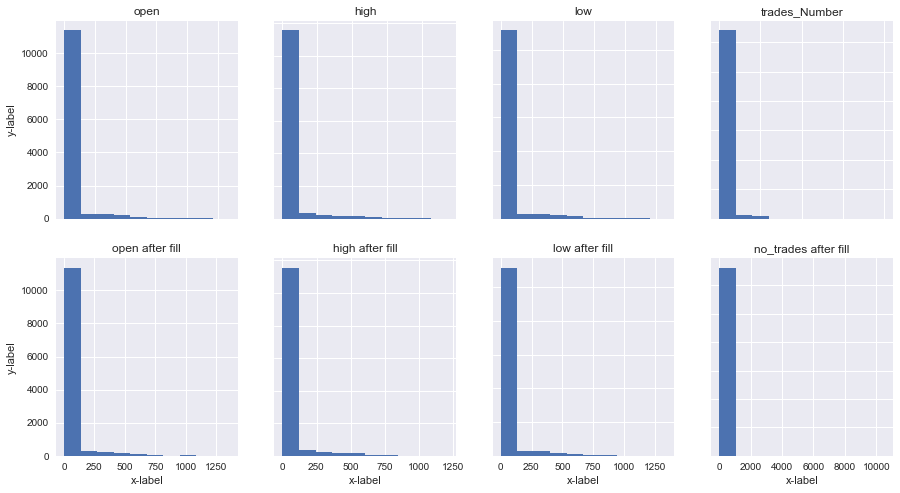

In [6]:
plt.style.use("seaborn")
fig, axs = plt.subplots(2, 4,figsize=(15,8))
axs[0, 0].hist(x=df['open'].value_counts())
axs[0, 0].set_title('open')
axs[0, 1].hist(df['high'].value_counts())
axs[0, 1].set_title('high')
axs[0, 2].hist(df['low'].value_counts())
axs[0, 2].set_title('low')
#axs[0, 3].hist(df['close'].value_counts())
#axs[0, 3].set_title('close')
axs[0, 3].hist(df['trades_Number'].value_counts())
axs[0, 3].set_title('trades_Number')

#Ignore the rows with a zeros value in the close column 
df = df.loc[df["close"] != 0]

# Filling the NaN with forward and backward filling
df.iloc[:,5:8]=df.iloc[:,5:8].ffill().bfill()
axs[1, 0].hist(df['open'].value_counts())
axs[1, 0].set_title('open after fill')
axs[1, 1].hist(df['high'].value_counts())
axs[1, 1].set_title('high after fill')
axs[1, 2].hist(df['low'].value_counts())
axs[1, 2].set_title('low after fill')
#axs[1, 3].hist(df['close'].value_counts())
#axs[1, 3].set_title('close after fill')

df['trades_Number'].fillna(df['trades_Number'].mode()[0], inplace=True)
axs[1, 3].hist(df['trades_Number'].value_counts())
axs[1, 3].set_title('no_trades after fill')


for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    


### filter the data as Energy secrtoers

In [7]:
Energy = df[df['sectoer']=='Energy'].round(1)
Energy.sort_values('date', inplace=True)
Energy.head()

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,trades_Number
12301,4030,National Shipping Company of Saudi Arabia,BAHRI,Energy,2001-12-31,9.2,9.2,9.2,9.2,9.2,0.0,256935,2367154.5,44.0
12300,4030,National Shipping Company of Saudi Arabia,BAHRI,Energy,2002-01-01,9.2,9.2,9.2,9.2,0.0,0.0,13693,125845.2,7.0
12299,4030,National Shipping Company of Saudi Arabia,BAHRI,Energy,2002-01-02,9.2,9.2,9.0,9.2,0.0,0.0,30793,281304.8,12.0
12298,4030,National Shipping Company of Saudi Arabia,BAHRI,Energy,2002-01-03,9.2,9.0,9.0,9.0,-0.2,-2.7,47315,430902.0,9.0
12297,4030,National Shipping Company of Saudi Arabia,BAHRI,Energy,2002-01-05,9.0,9.2,9.0,9.2,0.2,2.8,235129,2167297.2,27.0


In [8]:
ver=['symbol','name','sectoer','perc_Change','volume_traded']
Energy=Energy.drop(axis=1, columns=ver)
Energy.head()

,trading_name,date,open,high,low,close,change,value_traded,trades_Number
12301,BAHRI,2001-12-31,9.2,9.2,9.2,9.2,9.2,2367154.5,44.0
12300,BAHRI,2002-01-01,9.2,9.2,9.2,9.2,0.0,125845.2,7.0
12299,BAHRI,2002-01-02,9.2,9.2,9.0,9.2,0.0,281304.8,12.0
12298,BAHRI,2002-01-03,9.2,9.0,9.0,9.0,-0.2,430902.0,9.0
12297,BAHRI,2002-01-05,9.0,9.2,9.0,9.2,0.2,2167297.2,27.0


In [9]:
#set index for locating companies
trading_name_index=Energy.set_index("trading_name")
trading_name_index.dtypes

date             datetime64[ns]
open                    float64
high                    float64
low                     float64
close                   float64
change                  float64
value_traded            float64
trades_Number           float64
dtype: object

In [10]:
# creates an array of company names
uniqueVals = Energy["trading_name"].unique() 
# appends the results of all companies
grouped_df=pd.DataFrame()  # empty dataframe
for i in uniqueVals:
    # store DataFrame in list
    grouped_df=grouped_df.append((trading_name_index.loc[i,:]).groupby(['trading_name','date']).mean())
uniqueVals

array(['BAHRI', 'SARCO', 'ALDREES', 'PETRO RABIGH', 'SAUDI ARAMCO'],
      dtype=object)

### 1- Closing price of National Shipping Company of Saudi Arabia Co.(BAHRI).

In [11]:
grouped_BAHRI = (grouped_df.loc["BAHRI",:]).reset_index()
grouped_BAHRI.round(2).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4755 entries, 0 to 4754
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4755 non-null   datetime64[ns]
 1   open           4755 non-null   float64       
 2   high           4755 non-null   float64       
 3   low            4755 non-null   float64       
 4   close          4755 non-null   float64       
 5   change         4755 non-null   float64       
 6   value_traded   4755 non-null   float64       
 7   trades_Number  4755 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 297.3 KB


In [12]:
grouped_BAHRI.head()

,date,open,high,low,close,change,value_traded,trades_Number
0,2001-12-31,9.2,9.2,9.2,9.2,9.2,2367154.5,44.0
1,2002-01-01,9.2,9.2,9.2,9.2,0.0,125845.2,7.0
2,2002-01-02,9.2,9.2,9.0,9.2,0.0,281304.8,12.0
3,2002-01-03,9.2,9.0,9.0,9.0,-0.2,430902.0,9.0
4,2002-01-05,9.0,9.2,9.0,9.2,0.2,2167297.2,27.0


In [13]:
#converting into csv
#grouped_ARAMCO.to_csv('grouped_ARAMCO.csv', encoding='utf-8', index=False)

In [14]:
def feature_select(data):
    data=data.filter(['date','change','close','value_traded','trades_Number'], axis=1)
    date_index=data.set_index("date")
    return date_index

In [15]:
date_index = feature_select(grouped_BAHRI)


In [16]:
date_index.dtypes

change           float64
close            float64
value_traded     float64
trades_Number    float64
dtype: object

In [17]:
date_index.head()

,change,close,value_traded,trades_Number
date,,,,
2001-12-31,9.2,9.2,2367154.5,44.0
2002-01-01,0.0,9.2,125845.2,7.0
2002-01-02,0.0,9.2,281304.8,12.0
2002-01-03,-0.2,9.0,430902.0,9.0
2002-01-05,0.2,9.2,2167297.2,27.0


In [18]:
date_index.describe()

,change,close,value_traded,trades_Number
count,4755.000000,4755.000000,4.755000e+03,4755.000000
mean,0.022040,27.494911,1.214784e+08,1076.178970
std,1.158451,14.135387,2.371290e+08,1246.315229
min,-8.000000,8.200000,1.515000e+04,1.000000
25%,-0.200000,17.200000,1.477369e+07,298.000000
50%,0.000000,26.200000,4.060482e+07,636.000000
75%,0.200000,34.800000,1.128936e+08,1378.000000
max,49.200000,100.500000,4.023297e+09,13417.000000


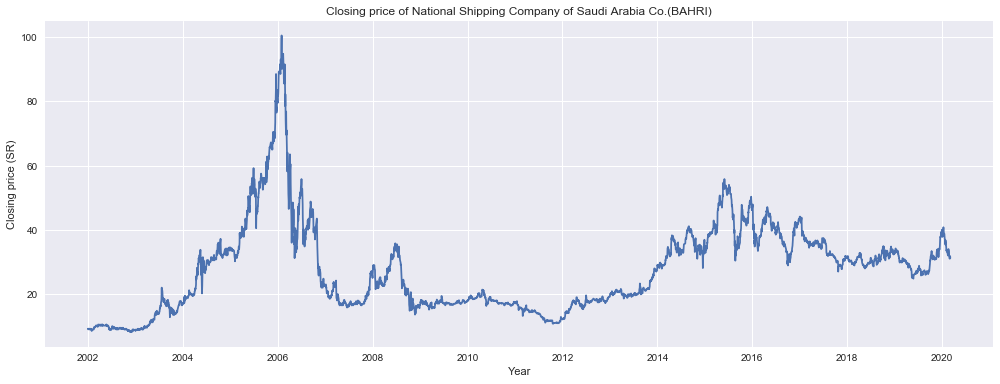

In [19]:
plt.style.use("seaborn")
plt.figure(figsize=(17, 6))
plt.plot(date_index['close'])
plt.title('Closing price of National Shipping Company of Saudi Arabia Co.(BAHRI)')
plt.ylabel('Closing price (SR)')
plt.xlabel('Year')
plt.show()

In [20]:
date_index.head()

,change,close,value_traded,trades_Number
date,,,,
2001-12-31,9.2,9.2,2367154.5,44.0
2002-01-01,0.0,9.2,125845.2,7.0
2002-01-02,0.0,9.2,281304.8,12.0
2002-01-03,-0.2,9.0,430902.0,9.0
2002-01-05,0.2,9.2,2167297.2,27.0


In [21]:
#date_index.head()
date_index.tail()

,change,close,value_traded,trades_Number
date,,,,
2020-03-01,-0.2,31.0,22034664.9,1289.0
2020-03-02,0.4,31.4,34043599.5,1142.0
2020-03-03,0.4,31.8,26113466.4,982.0
2020-03-04,-0.1,31.7,11603986.9,545.0
2020-03-05,-0.6,31.2,18754348.6,796.0


In [22]:
mean_pre_100=date_index['close'].rolling(100).mean()
mean_pre_100

date
2001-12-31       NaN
2002-01-01       NaN
2002-01-02       NaN
2002-01-03       NaN
2002-01-05       NaN
               ...  
2020-03-01    34.307
2020-03-02    34.296
2020-03-03    34.298
2020-03-04    34.304
2020-03-05    34.305
Name: close, Length: 4755, dtype: float64

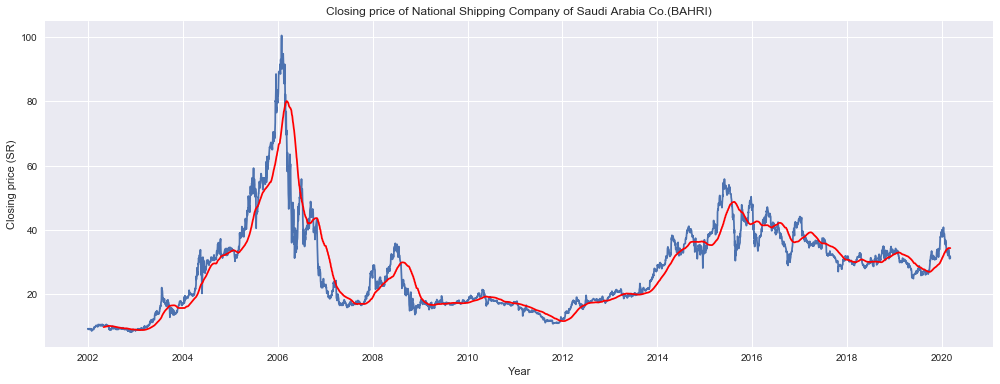

In [24]:
plt.style.use("seaborn")
plt.figure(figsize=(17, 6))
plt.plot(date_index['close'])
plt.plot(mean_pre_100,'r')
plt.title('Closing price of National Shipping Company of Saudi Arabia Co.(BAHRI)')
plt.ylabel('Closing price (SR)')
plt.xlabel('Year')
plt.show()

In [25]:
mean_pre_200=date_index['close'].rolling(200).mean()
mean_pre_200

date
2001-12-31        NaN
2002-01-01        NaN
2002-01-02        NaN
2002-01-03        NaN
2002-01-05        NaN
               ...   
2020-03-01    30.7585
2020-03-02    30.7805
2020-03-03    30.8085
2020-03-04    30.8415
2020-03-05    30.8685
Name: close, Length: 4755, dtype: float64

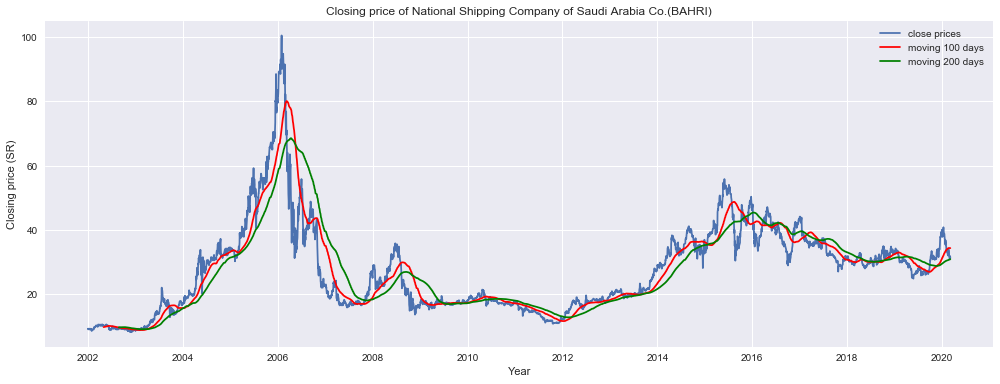

In [26]:
plt.style.use("seaborn")
plt.figure(figsize=(17, 6))
plt.plot(date_index['close'],label='close prices')
plt.plot(mean_pre_100,'r',label='moving 100 days')
plt.plot(mean_pre_200,'g',label='moving 200 days')
plt.title('Closing price of National Shipping Company of Saudi Arabia Co.(BAHRI)')
plt.ylabel('Closing price (SR)')
plt.xlabel('Year')
plt.legend()
plt.show()

### split data

In [27]:
def split_train_test(data):
    data_train=pd.DataFrame(data['close'][0:int(len(data)*0.80)])
    data_test=pd.DataFrame(data['close'][int(len(data)*0.80):int(len(data))])
    print(data_train.shape, data_test.shape)
    return data_train , data_test

In [28]:
data_train , data_test = split_train_test(date_index)

(3804, 1) (951, 1)


In [29]:
data_train.tail()

,close
date,
2016-05-05,44.3
2016-05-08,44.2
2016-05-09,44.2
2016-05-10,44.0
2016-05-11,44.6


In [30]:
data_test.head()

,close
date,
2016-05-12,44.9
2016-05-15,45.1
2016-05-16,44.8
2016-05-17,45.0
2016-05-18,44.8


### MinMaxScaler

In [31]:
MMS = MinMaxScaler(feature_range=(0,1))
data_train_MMS = MMS.fit_transform(data_train)

In [32]:
def split_train(data_train_MMS):
    x_train=[]
    y_train=[]

    #split feature and target
    for i in range(180,data_train_MMS.shape[0]):
        x_train.append(data_train_MMS[i-180:i])
        y_train.append(data_train_MMS[i,0])

    x_train,y_train=np.array(x_train),np.array(y_train)
    return x_train , y_train


In [33]:
x_train , y_train = split_train(data_train_MMS)
x_train.shape

(3624, 180, 1)

### LSTM Model

In [34]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [35]:
lstm=Sequential()
#layers

#(x_train.shape[1],1)--->shape[1]'(it is my 180 days)',1 (it is my close)
lstm.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
lstm.add(Dropout(0.2))

#layer-2
lstm.add(LSTM(units=60,activation='relu',return_sequences=True))
lstm.add(Dropout(0.3))

#layer-3
lstm.add(LSTM(units=80,activation='relu',return_sequences=True))
lstm.add(Dropout(0.4))

#layer-4
lstm.add(LSTM(units=120,activation='relu'))
lstm.add(Dropout(0.5))

#connect the layers
lstm.add(Dense(units=1))

In [36]:
lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 180, 50)           10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 180, 50)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 180, 60)           26640     
_________________________________________________________________
dropout_2 (Dropout)          (None, 180, 60)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 180, 80)           45120     
_________________________________________________________________
dropout_3 (Dropout)          (None, 180, 80)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 120)              

In [37]:
#lstm.compile(optimizer='adam',loss='mean_squared_error')
#lstm.fit(x_train,y_train,epochs=50)

In [38]:
#lstm.save('KSA_BAHRI_Stocks_LSTM_model.h5')
lstm=load_model("KSA_BAHRI_Stocks_LSTM_model.h5")

In [39]:
data_test.head()

,close
date,
2016-05-12,44.9
2016-05-15,45.1
2016-05-16,44.8
2016-05-17,45.0
2016-05-18,44.8


In [40]:
def split_test(data_train,data_test):
    MMS = MinMaxScaler(feature_range=(0,1))
    #get the last 180 day to pridict 
    last_180_days=data_train.tail(180)

    #test data
    final_df=last_180_days.append(data_test,ignore_index=True)

    final_df_MMS = MMS.fit_transform(final_df)
    final_df_MMS
    x_test=[]
    y_test=[]

    #split feature and target
    for i in range(180,final_df_MMS.shape[0]):
        x_test.append(final_df_MMS[i-180:i])
        y_test.append(final_df_MMS[i,0])

    x_test,y_test=np.array(x_test),np.array(y_test)
    print(x_test.shape)
    print(y_test.shape)

    return x_test , y_test

In [41]:
x_test , y_test = split_test(data_train,data_test)

(951, 180, 1)
(951,)


#### prediction Close Stock

In [42]:
y_predicted=lstm.predict(x_test)

In [43]:
mean_absolute_error(y_true=y_test, y_pred=y_predicted)

0.03416401268542399

In [45]:
y_predicted.shape

(951, 1)

### evaluating regression models 

In [46]:
# Function for evaluating regression models

def reg_cost(method, actual, preds):
    mae = mean_absolute_error(y_true=actual, y_pred=preds)
    mse = mean_squared_error(y_true=actual, y_pred=preds)
    
    print(f'Cost functions for the {method} regression is:')
    print(f'Mean Square Error: {round(mse,4)}')
    print(f'Mean Absolute Error: {round(mae,4)}\n\n')

In [47]:
model_name = ['LSTM']
model_pred = [y_predicted]

for x in range(len(model_pred)):
    
    reg_cost(model_name[x],y_test, model_pred[x] )

Cost functions for the LSTM regression is:
Mean Square Error: 0.0021
Mean Absolute Error: 0.0342




In [48]:
# to represent the origin data
print(MMS.scale_ [0])

0.010834236186348862


In [49]:
scale = MMS.scale_ [0]
MMS_Factor=1/scale
y_predicted=y_predicted*MMS_Factor
y_test=y_test*MMS_Factor

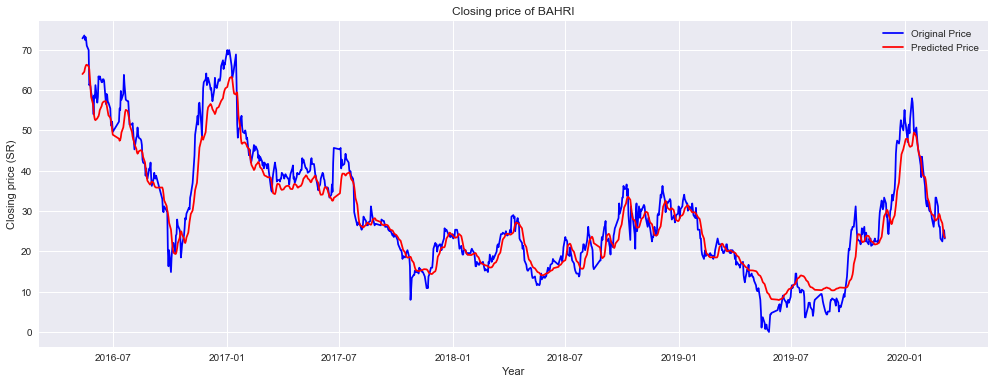

In [50]:
plt.style.use("seaborn")
plt.figure(figsize=(17, 6))
plt.plot(data_test.index,y_test,'b',label='Original Price')
plt.plot(data_test.index,y_predicted,'r',label='Predicted Price')
plt.title('Closing price of BAHRI')
plt.ylabel('Closing price (SR)')
plt.xlabel('Year')
plt.legend()
plt.show()

In [51]:
#results
testdata= pd.DataFrame()
testdata['date']=data_test.index
testdata['Actual_close'] = y_test
testdata['Predict_close'] = y_predicted


testdata['p>0.1a']=(testdata['Actual_close']-0.15*testdata['Actual_close'])

testdata['p<0.1a']=testdata['Actual_close']+0.15*testdata['Actual_close']


testdata['results_LSTM'] =(testdata['Predict_close']>=testdata['Actual_close']-0.15*testdata['Actual_close'])&(testdata['Predict_close']<=testdata['Actual_close']+0.15*testdata['Actual_close'])

(((testdata['results_LSTM'].value_counts())/len(testdata['results_LSTM']))*100).round(2).astype(str)+'%'

True     71.71%
False    28.29%
Name: results_LSTM, dtype: object

In [52]:
testdata.head()

,date,Actual_close,Predict_close,p>0.1a,p<0.1a,results_LSTM
0,2016-05-12,72.754118,63.916859,61.841000,83.667235,True
1,2016-05-15,73.478039,64.480202,62.456333,84.499745,True
2,2016-05-16,72.392157,65.265198,61.533333,83.250980,True
3,2016-05-17,73.116078,65.811378,62.148667,84.083490,True
4,2016-05-18,72.392157,66.162254,61.533333,83.250980,True


In [53]:
#testdata.to_csv('BAHRI.csv', encoding='utf-8', index=False)

## 2- Closing price of Saudi Pharmaceutical Industries & Medical Appliances Corporation (SARCO)

### EDA

In [54]:
grouped_SARCO = (grouped_df.loc["SARCO",:]).reset_index()
grouped_SARCO.round(2).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4458 entries, 0 to 4457
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4458 non-null   datetime64[ns]
 1   open           4458 non-null   float64       
 2   high           4458 non-null   float64       
 3   low            4458 non-null   float64       
 4   close          4458 non-null   float64       
 5   change         4458 non-null   float64       
 6   value_traded   4458 non-null   float64       
 7   trades_Number  4458 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 278.8 KB


In [55]:
date_index1=feature_select(grouped_SARCO)

In [56]:
date_index1.tail()

,change,close,value_traded,trades_Number
date,,,,
2020-03-01,-2.0,34.6,25747967.6,1625.0
2020-03-02,-0.6,34.0,25858700.6,1242.0
2020-03-03,1.0,35.0,17116413.4,854.0
2020-03-04,0.2,35.3,25981391.4,1268.0
2020-03-05,-0.4,34.9,15399073.5,804.0


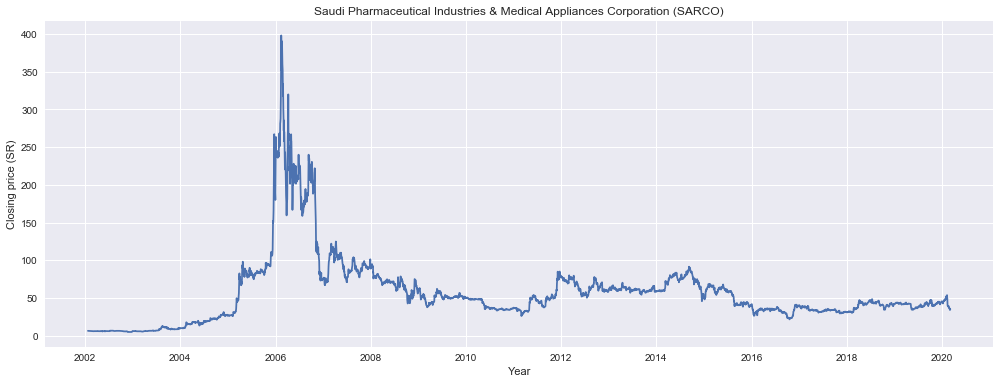

In [57]:
plt.style.use("seaborn")
plt.figure(figsize=(17, 6))
plt.plot(date_index1['close'])
plt.title('Saudi Pharmaceutical Industries & Medical Appliances Corporation (SARCO)')
plt.ylabel('Closing price (SR)')
plt.xlabel('Year')
plt.show()

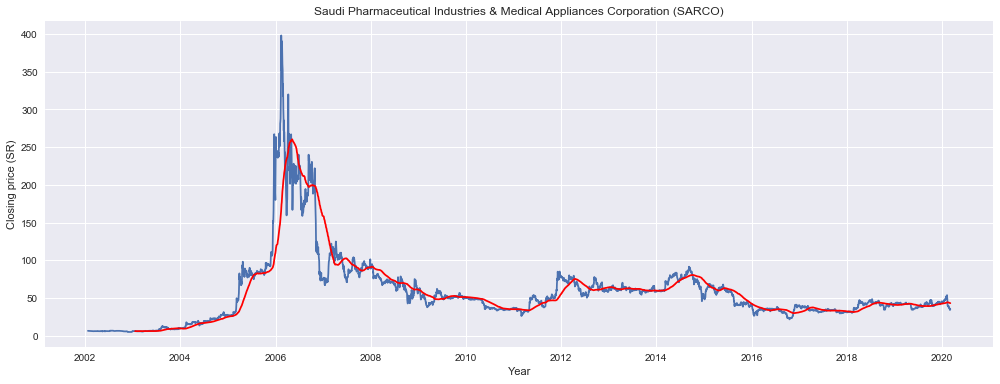

In [58]:
plt.style.use("seaborn")
mean_pre_100=date_index1['close'].rolling(100).mean()
plt.figure(figsize=(17, 6))
plt.plot(date_index1['close'])
plt.plot(mean_pre_100,'r')
plt.title('Saudi Pharmaceutical Industries & Medical Appliances Corporation (SARCO)')
plt.ylabel('Closing price (SR)')
plt.xlabel('Year')
plt.show()

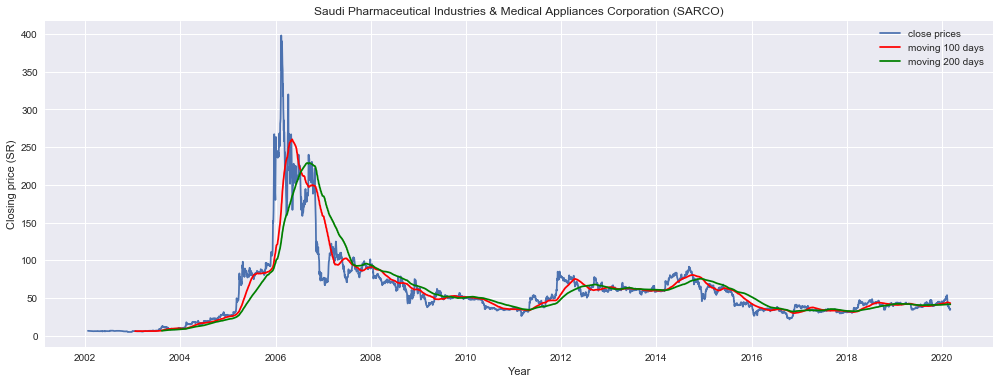

In [59]:
plt.style.use("seaborn")
mean_pre_200=date_index1['close'].rolling(200).mean()
plt.figure(figsize=(17, 6))
plt.plot(date_index1['close'],label='close prices')
plt.plot(mean_pre_100,'r',label='moving 100 days')
plt.plot(mean_pre_200,'g',label='moving 200 days')
plt.title('Saudi Pharmaceutical Industries & Medical Appliances Corporation (SARCO)')
plt.ylabel('Closing price (SR)')
plt.xlabel('Year')
plt.legend()
plt.show()

In [60]:
date_index1.shape

(4458, 4)

In [61]:
data_train1 , data_test1 = split_train_test(date_index1)

(3566, 1) (892, 1)


### Min Max Scaler

In [62]:
MMS = MinMaxScaler(feature_range=(0,1))
data_train_MMS1 = MMS.fit_transform(data_train)

#### split data

In [63]:
x_train1, y_train1 = split_train(data_train_MMS1)
x_train1.shape

(3624, 180, 1)

In [64]:
#lstm.compile(optimizer='adam',loss='mean_squared_error')
#lstm.fit(x_train1,y_train1,epochs=50)

In [65]:
#lstm.save('KSA_SARCO_Stocks_LSTM_model.h5')
lstm=load_model("KSA_SARCO_Stocks_LSTM_model.h5")

In [66]:
x_test1 , y_test1 = split_test(data_train1,data_test1)

(892, 180, 1)
(892,)


In [67]:
y_predicted1=lstm.predict(x_test1)

In [68]:
mean_absolute_error(y_true=y_test1, y_pred=y_predicted1)

0.05024760714812392

In [69]:
model_name1 = ['LSTM']
model_pred1 = [y_predicted1]

for x in range(len(model_pred1)):
    
    reg_cost(model_name1[x],y_test1, model_pred1[x] )

Cost functions for the LSTM regression is:
Mean Square Error: 0.0043
Mean Absolute Error: 0.0502




In [70]:
print(MMS.scale_[0])

0.010834236186348862


In [71]:
scale=MMS.scale_ [0]
MMS_Factor1=1/scale
y_predicted1=y_predicted1*MMS_Factor1
y_test1=y_test1*MMS_Factor1

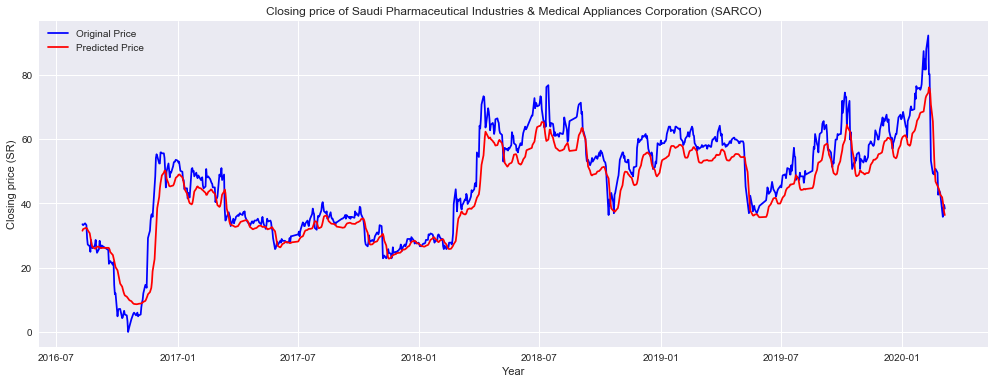

In [72]:
plt.style.use("seaborn")
plt.figure(figsize=(17, 6))
plt.plot(data_test1.index,y_test1,'b',label='Original Price')
plt.plot(data_test1.index,y_predicted1,'r',label='Predicted Price')
plt.title('Closing price of Saudi Pharmaceutical Industries & Medical Appliances Corporation (SARCO)')
plt.ylabel('Closing price (SR)')
plt.xlabel('Year')
plt.legend()
plt.show()

In [73]:
#results

testdata1= pd.DataFrame()

testdata1['Actual_close'] = y_test1
testdata1['Predict_close'] = y_predicted1

testdata1['p>0.1a']=(testdata1['Actual_close']-0.15*testdata1['Actual_close'])

testdata1['p<0.1a']=testdata1['Actual_close']+0.15*testdata1['Actual_close']


testdata1['results_LSTM'] =(testdata1['Predict_close']>=testdata1['Actual_close']-0.15*testdata1['Actual_close'])&(testdata1['Predict_close']<=testdata1['Actual_close']+0.15*testdata1['Actual_close'])

testdata1.head()

,Actual_close,Predict_close,p>0.1a,p<0.1a,results_LSTM
0,33.537578,31.508186,28.506941,38.568214,True
1,33.250932,32.020073,28.263292,38.238571,True
2,33.824224,32.298714,28.750590,38.897857,True
3,33.537578,32.389954,28.506941,38.568214,True
4,33.250932,32.346687,28.263292,38.238571,True


In [74]:
(((testdata1['results_LSTM'].value_counts())/len(testdata1['results_LSTM']))*100).round(2).astype(str)+'%'

True     84.64%
False    15.36%
Name: results_LSTM, dtype: object

In [75]:
#testdata1.to_csv('SARCO.csv', encoding='utf-8', index=False)

# Communication Services

In [76]:
cs = df[df['sectoer']=='Communication Services'].round(1)
cs.sort_values('date', inplace=True)
cs.head()

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,trades_Number
263765,4070,Tihama Advertising and Public Relations Co.,TAPRCO,Communication Services,2001-12-31,21.0,21.0,21.0,21.0,-31.0,-59.6,3750,77933.8,3.0
263764,4070,Tihama Advertising and Public Relations Co.,TAPRCO,Communication Services,2002-01-01,21.0,20.5,20.5,20.5,-0.5,-2.4,5213,107898.8,6.0
263763,4070,Tihama Advertising and Public Relations Co.,TAPRCO,Communication Services,2002-01-02,20.5,20.5,20.5,20.5,0.0,0.0,6250,129375.0,2.0
263762,4070,Tihama Advertising and Public Relations Co.,TAPRCO,Communication Services,2002-01-03,20.5,20.5,20.5,20.5,0.0,0.0,25325,522320.0,5.0
263761,4070,Tihama Advertising and Public Relations Co.,TAPRCO,Communication Services,2002-01-05,20.5,21.0,20.5,20.5,0.0,0.0,17425,359205.0,7.0


In [77]:
ver=['symbol','name','sectoer','perc_Change','volume_traded']
cs=cs.drop(axis=1, columns=ver)
cs.head()

,trading_name,date,open,high,low,close,change,value_traded,trades_Number
263765,TAPRCO,2001-12-31,21.0,21.0,21.0,21.0,-31.0,77933.8,3.0
263764,TAPRCO,2002-01-01,21.0,20.5,20.5,20.5,-0.5,107898.8,6.0
263763,TAPRCO,2002-01-02,20.5,20.5,20.5,20.5,0.0,129375.0,2.0
263762,TAPRCO,2002-01-03,20.5,20.5,20.5,20.5,0.0,522320.0,5.0
263761,TAPRCO,2002-01-05,20.5,21.0,20.5,20.5,0.0,359205.0,7.0


In [78]:
#set index for locating companies
trading_name_index_cs=cs.set_index("trading_name")
trading_name_index_cs.dtypes

date             datetime64[ns]
open                    float64
high                    float64
low                     float64
close                   float64
change                  float64
value_traded            float64
trades_Number           float64
dtype: object

In [79]:
# creates an array of company names
uniqueVals_cs = cs["trading_name"].unique() 
# appends the results of all companies
grouped_df_cs=pd.DataFrame()  # empty dataframe
for i in uniqueVals_cs:
    # store DataFrame in list
    grouped_df_cs=grouped_df_cs.append((trading_name_index_cs.loc[i,:]).groupby(['trading_name','date']).mean())
uniqueVals_cs

array(['TAPRCO', 'STC', 'ETIHAD ETISALAT', 'SRMG', 'ZAIN KSA',
       'ATHEEB TELECOM'], dtype=object)

## Tihama Advertising and Public Relations Co.(TAPRCO)

In [80]:
grouped_TAPRCO = (grouped_df_cs.loc["TAPRCO",:]).reset_index()
grouped_TAPRCO.round(2).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4695 entries, 0 to 4694
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4695 non-null   datetime64[ns]
 1   open           4695 non-null   float64       
 2   high           4695 non-null   float64       
 3   low            4695 non-null   float64       
 4   close          4695 non-null   float64       
 5   change         4695 non-null   float64       
 6   value_traded   4695 non-null   float64       
 7   trades_Number  4695 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 293.6 KB


In [81]:
date_index2=feature_select(grouped_TAPRCO)

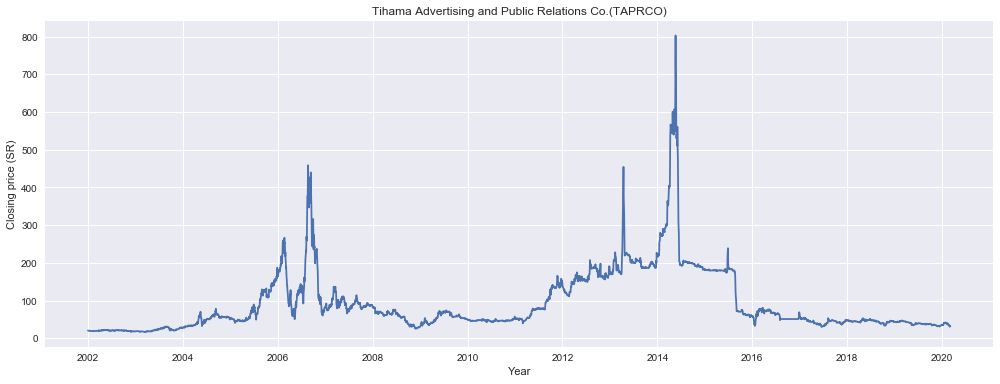

In [82]:
plt.style.use("seaborn")
plt.figure(figsize=(17, 6))
plt.plot(date_index2['close'])
plt.title('Tihama Advertising and Public Relations Co.(TAPRCO)')
plt.ylabel('Closing price (SR)')
plt.xlabel('Year')
plt.show()

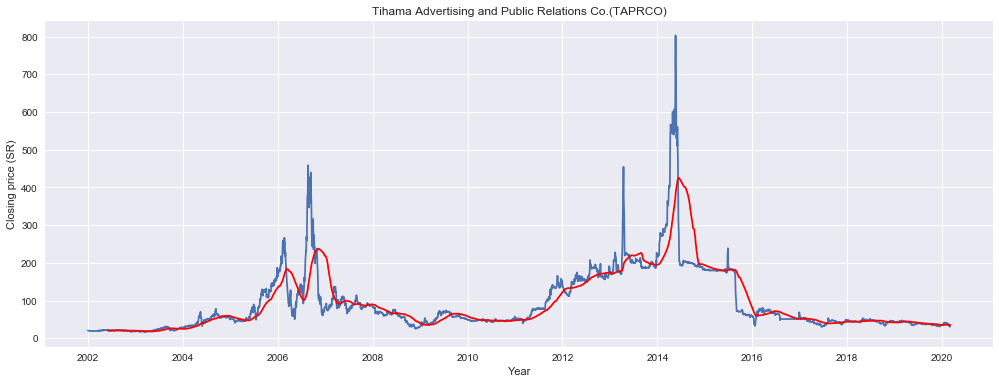

In [83]:
plt.style.use("seaborn")
mean_pre_100=date_index2['close'].rolling(100).mean()
plt.figure(figsize=(17, 6))
plt.plot(date_index2['close'])
plt.plot(mean_pre_100,'r')
plt.title('Tihama Advertising and Public Relations Co.(TAPRCO)')
plt.ylabel('Closing price (SR)')
plt.xlabel('Year')
plt.show()

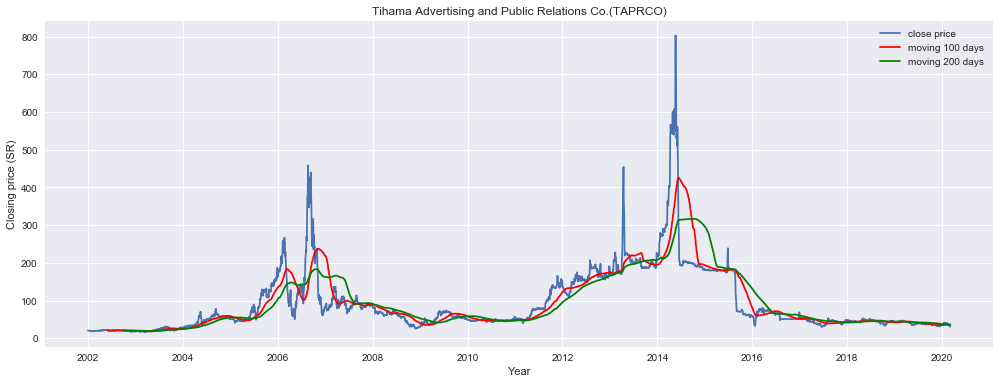

In [84]:
plt.style.use("seaborn")
mean_pre_200=date_index2['close'].rolling(200).mean()
plt.figure(figsize=(17, 6))
plt.plot(date_index2['close'],label='close price')
plt.plot(mean_pre_100,'r',label='moving 100 days')
plt.plot(mean_pre_200,'g',label='moving 200 days')
plt.title('Tihama Advertising and Public Relations Co.(TAPRCO)')
plt.ylabel('Closing price (SR)')
plt.xlabel('Year')
plt.legend()
plt.show()

In [85]:
data_train2 , data_test2 = split_train_test(date_index2)
data_train2

(3756, 1) (939, 1)


,close
date,
2001-12-31,21.0
2002-01-01,20.5
2002-01-02,20.5
2002-01-03,20.5
2002-01-05,20.5
...,...
2016-05-23,67.5
2016-05-24,70.1
2016-05-25,70.9


In [86]:
MMS2 = MinMaxScaler(feature_range=(0,1))
data_train_MMS2 = MMS2.fit_transform(data_train2)

In [88]:
x_train2, y_train2 = split_train(data_train_MMS2)
x_train2.shape

(3576, 180, 1)

In [89]:
#lstm.compile(optimizer='adam',loss='mean_squared_error')
#lstm.fit(x_train2,y_train2,epochs=50)

In [90]:
#lstm.save('KSA_TAPRCO_Stocks_LSTM_model.h5')
lstm=load_model("KSA_TAPRCO_Stocks_LSTM_model.h5")

In [91]:
x_test2 , y_test2 = split_test(data_train2,data_test2)

(939, 180, 1)
(939,)


In [92]:
y_predicted2=lstm.predict(x_test2)

In [93]:
mean_absolute_error(y_true=y_test2, y_pred=y_predicted2)

0.02660227850746634

In [94]:
model_name2 = ['LSTM']
model_pred2 = [y_predicted2]

for x in range(len(model_pred2)):
    
    reg_cost(model_name2[x],y_test2, model_pred2[x] )

Cost functions for the LSTM regression is:
Mean Square Error: 0.0012
Mean Absolute Error: 0.0266




In [95]:
#to represent the origin data
print(MMS.scale_ [0])


0.010834236186348862


In [96]:
scale=MMS.scale_ [0]
MMS_Factor2=1/scale
y_predicted2=y_predicted2*MMS_Factor2
y_test2=y_test2*MMS_Factor2


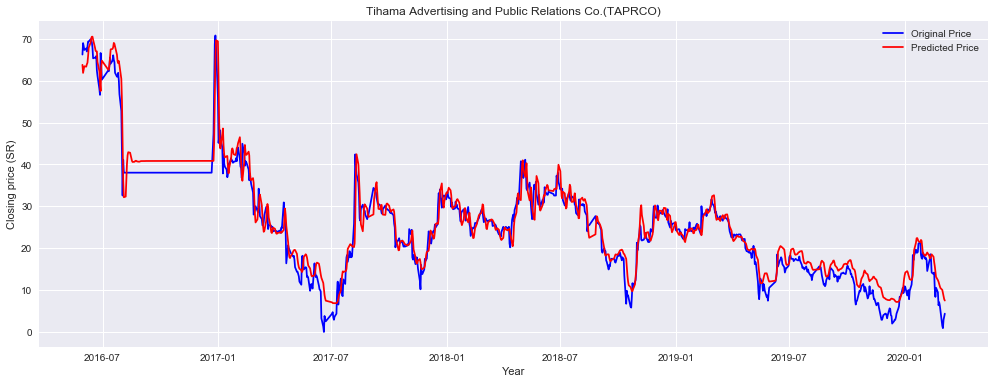

In [97]:
plt.style.use("seaborn")
plt.figure(figsize=(17, 6))
plt.plot(data_test2.index,y_test2,'b',label='Original Price')
plt.plot(data_test2.index,y_predicted2,'r',label='Predicted Price')
plt.title('Tihama Advertising and Public Relations Co.(TAPRCO)')
plt.ylabel('Closing price (SR)')
plt.xlabel('Year')
plt.legend()
plt.show()

In [98]:
#results

testdata2= pd.DataFrame()
testdata2['date']=data_test2.index
testdata2['Actual_close'] = y_test2
testdata2['Predict_close'] = y_predicted2

testdata2['p>0.1a']=(testdata2['Actual_close']-0.15*testdata2['Actual_close'])

testdata2['p<0.1a']=testdata2['Actual_close']+0.15*testdata2['Actual_close']


testdata2['results_LSTM'] =(testdata2['Predict_close']>=testdata2['Actual_close']-0.15*testdata2['Actual_close'])&(testdata2['Predict_close']<=testdata2['Actual_close']+0.15*testdata2['Actual_close'])

testdata2.head()

,date,Actual_close,Predict_close,p>0.1a,p<0.1a,results_LSTM
0,2016-05-30,66.266667,63.801422,56.326667,76.206667,True
1,2016-05-31,68.997436,61.872570,58.647821,79.347051,True
2,2016-06-01,68.269231,62.690578,58.028846,78.509615,True
3,2016-06-02,67.358974,63.468407,57.255128,77.462821,True
4,2016-06-05,67.723077,63.361897,57.564615,77.881538,True


In [99]:
#testdata2.to_csv('TAPRCO.csv', encoding='utf-8', index=False)

In [100]:
(((testdata2['results_LSTM'].value_counts())/len(testdata2['results_LSTM']))*100).round(2).astype(str)+'%'

True     73.7%
False    26.3%
Name: results_LSTM, dtype: object

# Closing price of Saudi Telecom Co. (STC)

In [101]:
grouped_STC = (grouped_df_cs.loc["STC",:]).reset_index()
grouped_STC.round(2).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4432 entries, 0 to 4431
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4432 non-null   datetime64[ns]
 1   open           4432 non-null   float64       
 2   high           4432 non-null   float64       
 3   low            4432 non-null   float64       
 4   close          4432 non-null   float64       
 5   change         4432 non-null   float64       
 6   value_traded   4432 non-null   float64       
 7   trades_Number  4432 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 277.1 KB


In [102]:
date_index3=feature_select(grouped_STC)

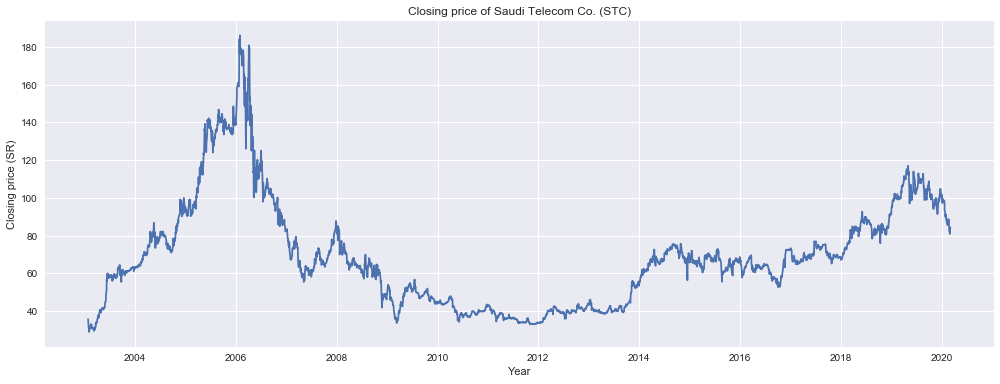

In [103]:
plt.figure(figsize=(17, 6))
plt.plot(date_index3['close'])
plt.title('Closing price of Saudi Telecom Co. (STC)')
plt.ylabel('Closing price (SR)')
plt.xlabel('Year')
plt.show()

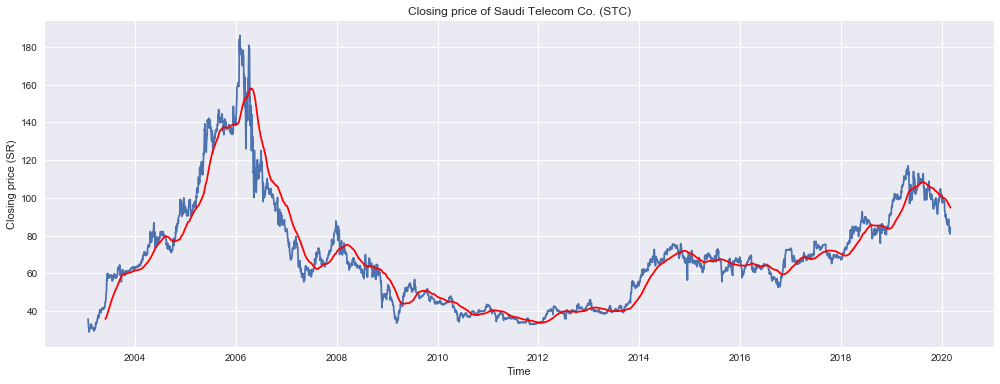

In [104]:
plt.style.use("seaborn")
mean_pre_100=date_index3['close'].rolling(100).mean()
plt.figure(figsize=(17, 6))
plt.plot(date_index3['close'])
plt.plot(mean_pre_100,'r')
plt.title('Closing price of Saudi Telecom Co. (STC)')
plt.ylabel('Closing price (SR)')
plt.xlabel('Time')
plt.show()

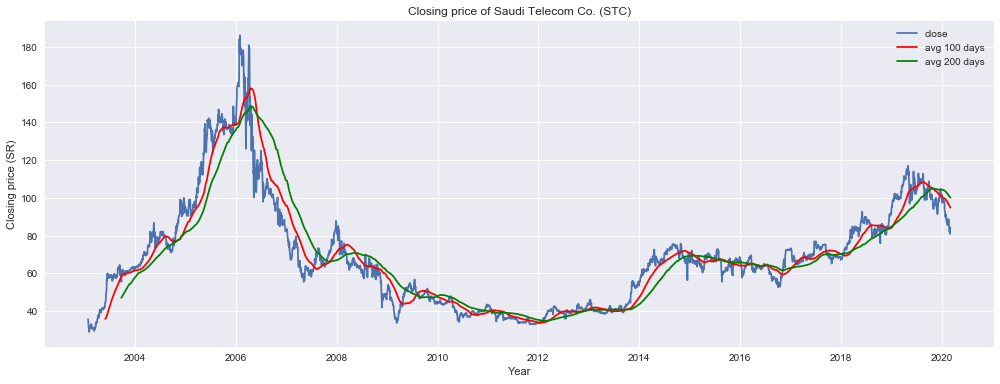

In [105]:
plt.style.use("seaborn")
mean_pre_200=date_index3['close'].rolling(200).mean()
plt.figure(figsize=(17, 6))
plt.plot(date_index3['close'])
plt.plot(mean_pre_100,'r',label='avg 100 days')
plt.plot(mean_pre_200,'g',label='avg 200 days')
plt.title('Closing price of Saudi Telecom Co. (STC)')
plt.ylabel('Closing price (SR)')
plt.xlabel('Year')
plt.legend()
plt.show()

In [106]:
data_train3 , data_test3 = split_train_test(date_index3)

(3545, 1) (887, 1)


In [107]:
MMS3 = MinMaxScaler(feature_range=(0,1))
    #Scaler_data = MMS.fit_transform(TAPRCO_df)
data_train_MMS3 = MMS3.fit_transform(data_train3)

In [108]:
#data_train_MMS3 = scale(data_train3)

In [109]:
x_train3, y_train3 = split_train(data_train_MMS3)
x_train3.shape

(3365, 180, 1)

In [110]:
#lstm.compile(optimizer='adam',loss='mean_squared_error')
#lstm.fit(x_train3,y_train3,epochs=50)

In [111]:
#lstm.save('KSA_STC_Stocks_LSTM_model.h5')
lstm=load_model("KSA_STC_Stocks_LSTM_model.h5")

In [112]:
x_test3 , y_test3 = split_test(data_train3,data_test3)

(887, 180, 1)
(887,)


In [113]:
y_predicted3=lstm.predict(x_test3)

In [114]:
mean_absolute_error(y_true=y_test3, y_pred=y_predicted3)

0.03343345831301212

In [115]:
model_name3 = ['LSTM']
model_pred3 = [y_predicted3]

for x in range(len(model_pred3)):
    
    reg_cost(model_name3[x],y_test3, model_pred3[x] )

Cost functions for the LSTM regression is:
Mean Square Error: 0.0021
Mean Absolute Error: 0.0334




In [116]:
print(MMS.scale_ [0])

0.010834236186348862


In [117]:
scale=MMS.scale_ [0]
MMS_Factor3=1/scale
y_predicted3=y_predicted3*MMS_Factor3
y_test3=y_test3*MMS_Factor3

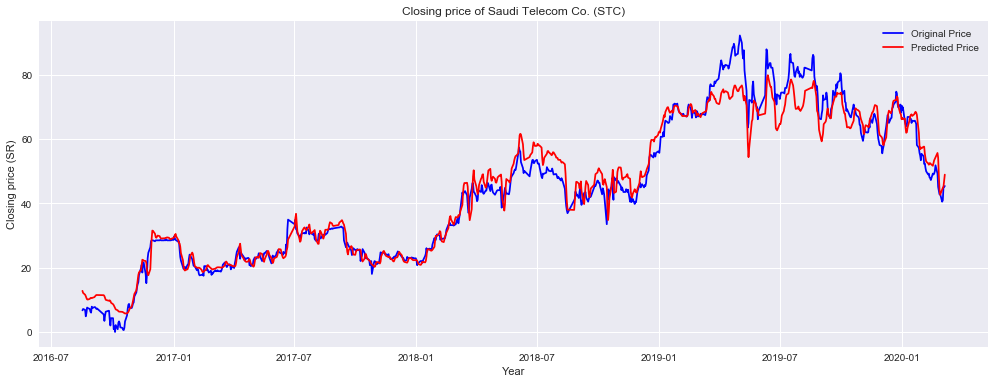

In [118]:
plt.style.use("seaborn")
plt.figure(figsize=(17, 6))
plt.plot(data_test3.index,y_test3,'b',label='Original Price')
plt.plot(data_test3.index,y_predicted3,'r',label='Predicted Price')
plt.title('Closing price of Saudi Telecom Co. (STC)')
plt.ylabel('Closing price (SR)')
plt.xlabel('Year')
plt.legend()
plt.show()

In [119]:
#results

testdata3= pd.DataFrame()
testdata3['date']=data_test3.index
testdata3['Actual_close'] = y_test3
testdata3['Predict_close'] = y_predicted3

testdata3['p>0.1a']=(testdata3['Actual_close']-0.15*testdata3['Actual_close'])

testdata3['p<0.1a']=testdata3['Actual_close']+0.15*testdata3['Actual_close']


testdata3['results_LSTM'] =(testdata3['Predict_close']>=testdata3['Actual_close']-0.15*testdata3['Actual_close'])&(testdata3['Predict_close']<=testdata3['Actual_close']+0.15*testdata3['Actual_close'])

testdata3.head()

,date,Actual_close,Predict_close,p>0.1a,p<0.1a,results_LSTM
0,2016-08-17,6.736180,12.802404,5.725753,7.746607,False
1,2016-08-18,7.166149,12.162953,6.091227,8.241071,False
2,2016-08-21,6.879503,11.599774,5.847578,7.911429,False
3,2016-08-22,4.872981,11.155489,4.142034,5.603929,False
4,2016-08-23,5.876242,10.588623,4.994806,6.757679,False


In [145]:
testdata3.to_csv('STC.csv', encoding='utf-8', index=False)

In [121]:
(((testdata3['results_LSTM'].value_counts())/len(testdata3['results_LSTM']))*100).round(2).astype(str)+'%'

True     90.19%
False     9.81%
Name: results_LSTM, dtype: object

# Benchmarking models

### Support Vector Machine Model

In [122]:
df_svm=feature_select(grouped_BAHRI)
df_svm.tail()

,change,close,value_traded,trades_Number
date,,,,
2020-03-01,-0.2,31.0,22034664.9,1289.0
2020-03-02,0.4,31.4,34043599.5,1142.0
2020-03-03,0.4,31.8,26113466.4,982.0
2020-03-04,-0.1,31.7,11603986.9,545.0
2020-03-05,-0.6,31.2,18754348.6,796.0


In [123]:
df_svm['Prediction'] = df_svm[['close']].shift(-180)

In [124]:
df_svm.head()

,change,close,value_traded,trades_Number,Prediction
date,,,,,
2001-12-31,9.2,9.2,2367154.5,44.0,9.2
2002-01-01,0.0,9.2,125845.2,7.0,9.0
2002-01-02,0.0,9.2,281304.8,12.0,9.0
2002-01-03,-0.2,9.0,430902.0,9.0,9.0
2002-01-05,0.2,9.2,2167297.2,27.0,9.0


In [125]:
df_svm['Prediction'].values

array([9.2, 9. , 9. , ..., nan, nan, nan])

In [126]:
X = np.array(df_svm.drop(['Prediction'],1))
#Remove the last 180 rows
X = X[:-180]
X.shape

(4575, 4)

In [127]:
y = np.array(df_svm['Prediction'])
# Remove Last 180 rows
y = y[:-180]
print(y.shape)


(4575,)


In [128]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [129]:
svr = SVR(C=100, gamma= 0.0001, kernel= 'rbf')
# Train the model 
svr.fit(x_train, y_train)

SVR(C=100, gamma=0.0001)

In [151]:
preds_svr = svr.predict(x_test)

In [131]:
#The performance of the system was evaluated using Mean Absolute Percentage Error (MAPE), 
#Root Mean Squared Error (RMSE) and Mean Squared Error (MSE) and compared with the models
mean_absolute_error(y_true=y_test, y_pred=preds_svr)

9.871453627552535

In [132]:
#svm score
print("SVM accuracy is ",(svr.score(x_test,y_test)*100).round(3).astype(str)+'%')

SVM accuracy is  0.327%


In [133]:
# Function for evaluating regression models
def reg_cost(method, actual, preds):
    mae = mean_absolute_error(y_true=actual, y_pred=preds)
    mse = mean_squared_error(y_true=actual, y_pred=preds)
    
    print(f'Cost functions for the {method} regression is:')
    print(f'Mean Square Error: {round(mse,2)}')
    print(f'Mean Absolute Error: {round(mae,2)}\n\n')

In [134]:
model_name = ['Support Vector']
model_pred = [preds_svr]

for x in range(len(model_pred)):
    
    reg_cost(model_name[x],y_test, model_pred[x] )

Cost functions for the Support Vector regression is:
Mean Square Error: 147.18
Mean Absolute Error: 9.87




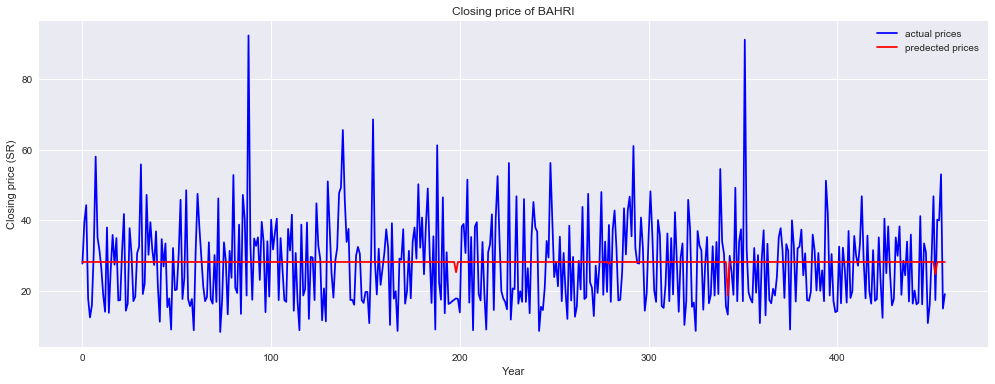

In [135]:
plt.style.use("seaborn")
plt.figure(figsize=(17, 6))
plt.plot(y_test,'b',label='actual prices')
plt.plot(preds_svr,'r',label='predected prices')
plt.title('Closing price of BAHRI')
plt.ylabel('Closing price (SR)')
plt.xlabel('Year')
plt.legend()
plt.show()

In [136]:
#results
testdata= pd.DataFrame()

testdata['Actual_close'] = y_test
testdata['Predict_close'] = preds_svr

testdata['p>0.1a']=(testdata['Actual_close']-0.15*testdata['Actual_close'])

testdata['p<0.1a']=testdata['Actual_close']+0.15*testdata['Actual_close']


testdata['results_SVM'] =(testdata['Predict_close']>=testdata['Actual_close']-0.15*testdata['Actual_close'])&(testdata['Predict_close']<=testdata['Actual_close']+0.15*testdata['Actual_close'])

testdata.head()

,Actual_close,Predict_close,p>0.1a,p<0.1a,results_SVM
0,27.8,28.261157,23.630,31.970,True
1,39.5,28.261157,33.575,45.425,False
2,44.3,28.261157,37.655,50.945,False
3,18.0,28.261157,15.300,20.700,False
4,12.6,28.261157,10.710,14.490,False


In [137]:
(((testdata['results_SVM'].value_counts())/len(testdata['results_SVM']))*100).round(2).astype(str)+'%'

False    77.29%
True     22.71%
Name: results_SVM, dtype: object

### Grid search

In [138]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','sigmoid']}
 
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.030 total time=   1.4s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.003 total time=   1.3s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.000 total time=   1.2s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.007 total time=   1.3s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.002 total time=   1.6s
[CV 1/5] END ...C=0.1, gamma=1, kernel=sigmoid;, score=-0.030 total time=   0.3s
[CV 2/5] END ...C=0.1, gamma=1, kernel=sigmoid;, score=-0.003 total time=   0.3s
[CV 3/5] END ...C=0.1, gamma=1, kernel=sigmoid;, score=-0.000 total time=   0.3s
[CV 4/5] END ...C=0.1, gamma=1, kernel=sigmoid;, score=-0.008 total time=   0.3s
[CV 5/5] END ...C=0.1, gamma=1, kernel=sigmoid;, score=-0.003 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.030 total time=   1.2s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;

[CV 2/5] END ........C=10, gamma=1, kernel=rbf;, score=-0.019 total time=   2.2s
[CV 3/5] END ........C=10, gamma=1, kernel=rbf;, score=-0.011 total time=   1.7s
[CV 4/5] END ........C=10, gamma=1, kernel=rbf;, score=-0.027 total time=   2.0s
[CV 5/5] END ........C=10, gamma=1, kernel=rbf;, score=-0.005 total time=   1.7s
[CV 1/5] END ....C=10, gamma=1, kernel=sigmoid;, score=-0.030 total time=   0.4s
[CV 2/5] END ....C=10, gamma=1, kernel=sigmoid;, score=-0.003 total time=   0.3s
[CV 3/5] END ....C=10, gamma=1, kernel=sigmoid;, score=-0.000 total time=   0.5s
[CV 4/5] END ....C=10, gamma=1, kernel=sigmoid;, score=-0.008 total time=   0.4s
[CV 5/5] END ....C=10, gamma=1, kernel=sigmoid;, score=-0.003 total time=   0.5s
[CV 1/5] END ......C=10, gamma=0.1, kernel=rbf;, score=-0.062 total time=   2.9s
[CV 2/5] END ......C=10, gamma=0.1, kernel=rbf;, score=-0.019 total time=   1.8s
[CV 3/5] END ......C=10, gamma=0.1, kernel=rbf;, score=-0.011 total time=   1.5s
[CV 4/5] END ......C=10, gam

[CV 3/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.003 total time=   1.7s
[CV 4/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.000 total time=   2.0s
[CV 5/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.009 total time=   2.3s
[CV 1/5] END ..C=1000, gamma=1, kernel=sigmoid;, score=-0.030 total time=   0.5s
[CV 2/5] END ..C=1000, gamma=1, kernel=sigmoid;, score=-0.003 total time=   0.5s
[CV 3/5] END ..C=1000, gamma=1, kernel=sigmoid;, score=-0.000 total time=   0.5s
[CV 4/5] END ..C=1000, gamma=1, kernel=sigmoid;, score=-0.008 total time=   0.5s
[CV 5/5] END ..C=1000, gamma=1, kernel=sigmoid;, score=-0.003 total time=   0.5s
[CV 1/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.015 total time=   2.7s
[CV 2/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.000 total time=   4.0s
[CV 3/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.003 total time=   3.0s
[CV 4/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.000 total time=   2.4s
[CV 5/5] END ....C=1000, gam

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=3)

In [139]:
grid_df = pd.DataFrame(grid.cv_results_)

grid_df 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.004044,0.108959,0.460763,0.061128,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",-0.030456,-0.003195,-1.129374e-05,-0.007353,-0.002390,-0.008681,0.011142,19
1,0.347217,0.006734,0.053064,0.001158,0.1,1,sigmoid,"{'C': 0.1, 'gamma': 1, 'kernel': 'sigmoid'}",-0.029562,-0.003426,-4.015375e-06,-0.008369,-0.002715,-0.008815,0.010720,21
2,0.923244,0.049219,0.378653,0.009264,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",-0.030456,-0.003195,-1.129374e-05,-0.007353,-0.002390,-0.008681,0.011142,19
3,0.387464,0.048042,0.064134,0.016181,0.1,0.1,sigmoid,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid'}",-0.029562,-0.003426,-4.015375e-06,-0.008369,-0.002715,-0.008815,0.010720,21
4,0.929724,0.035878,0.403469,0.017043,0.1,0.01,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",-0.030456,-0.003195,-1.129374e-05,-0.007353,-0.002390,-0.008681,0.011142,18
5,0.341847,0.009564,0.057653,0.005863,0.1,0.01,sigmoid,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'sigmoid'}",-0.029562,-0.003426,-4.015375e-06,-0.008369,-0.002715,-0.008815,0.010720,21
6,0.908577,0.056632,0.393713,0.007144,0.1,0.001,rbf,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}",-0.030456,-0.003190,-8.323607e-06,-0.007349,-0.002387,-0.008678,0.011144,17
7,0.359237,0.033450,0.062150,0.012867,0.1,0.001,sigmoid,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'sigmoid'}",-0.029562,-0.003426,-4.015375e-06,-0.008369,-0.002715,-0.008815,0.010720,21
8,0.905382,0.032624,0.414904,0.056989,0.1,0.0001,rbf,"{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}",-0.030451,-0.003142,4.717948e-06,-0.007326,-0.002354,-0.008654,0.011153,16
9,0.462783,0.091085,0.078907,0.022381,0.1,0.0001,sigmoid,"{'C': 0.1, 'gamma': 0.0001, 'kernel': 'sigmoid'}",-0.029562,-0.003426,-4.015375e-06,-0.008369,-0.002715,-0.008815,0.010720,21


In [140]:
parameters = ['param_C','param_gamma','param_kernel', 'mean_test_score','std_test_score','rank_test_score']

grid_df[parameters].head()

,param_C,param_gamma,param_kernel,mean_test_score,std_test_score,rank_test_score
0,0.1,1,rbf,-0.008681,0.011142,19
1,0.1,1,sigmoid,-0.008815,0.010720,21
2,0.1,0.1,rbf,-0.008681,0.011142,19
3,0.1,0.1,sigmoid,-0.008815,0.010720,21
4,0.1,0.01,rbf,-0.008681,0.011142,18


In [141]:
grid_df[parameters].sort_values('rank_test_score').head()

,param_C,param_gamma,param_kernel,mean_test_score,std_test_score,rank_test_score
48,1000,0.0001,rbf,-0.002652,0.007223,1
38,100,0.0001,rbf,-0.002652,0.007223,1
46,1000,0.001,rbf,-0.005026,0.006131,3
36,100,0.001,rbf,-0.005026,0.006131,3
34,100,0.01,rbf,-0.005508,0.005921,5


In [142]:
grid.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [143]:
grid.best_score_

-0.00265169041467197

In [144]:
grid.best_estimator_

SVR(C=100, gamma=0.0001)

## END